In [41]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import ensemble
import sklearn

def load_images_to_dict(key="stack", folder="train", height=24, width=36):
    #for switching between "train", "test", and "valid" folders
    path = (folder + "/" + folder)

    #makes a dictionary mapping species to all the files in that folder
    directories = {}
    for species_file in os.listdir(path):
        directories[species_file] = os.listdir(path  + "/" + species_file)

    #makes a dictionary mapping species to arrays for each image in that folder
    images = {}
    for directory in directories.keys():
        images[directory] = []
        for file in os.listdir(path + "/" + directory): 
            if key == "stack":
                array = np.array(Image.open(path + "/" + directory + "/" + file).resize((height,width)))
                images[directory].append(np.hstack((array[::,::,0],array[::,::,1],array[::,::,2])))
            elif key == "b/g":
                array = np.array(Image.open(path + "/" + directory + "/" + file).resize((height,width)))
                images[directory].append(np.hstack((array[::,::,1],array[::,::,2])))
            else:
                images[directory].append(np.array(Image.open(path + "/" + directory + "/" + file).resize((height,width)))[::,::,key])

    #return that dictionary
    return images

def build_X_y_from_dict(image_dict):
    X = []
    y = []
    
    i=0
    for key, value in image_dict.items():
        for image in value:
            X.append(image)
            y.append(i)
        i += 1
    
    y = np.array(y)
    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))

    return X, y

In [49]:
train_images = load_images_to_dict(key="stack")
X_train, y_train = build_X_y_from_dict(train_images)
test_images = load_images_to_dict(key="stack", folder="test")
X_test, y_test = build_X_y_from_dict(test_images)

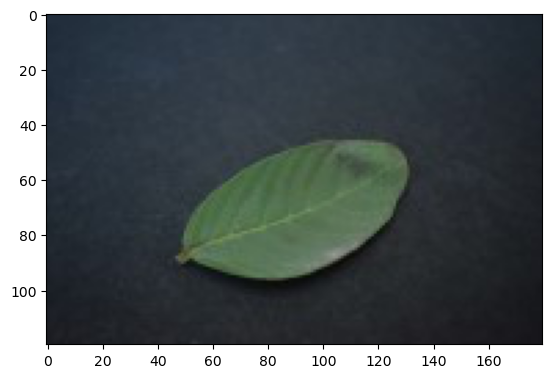

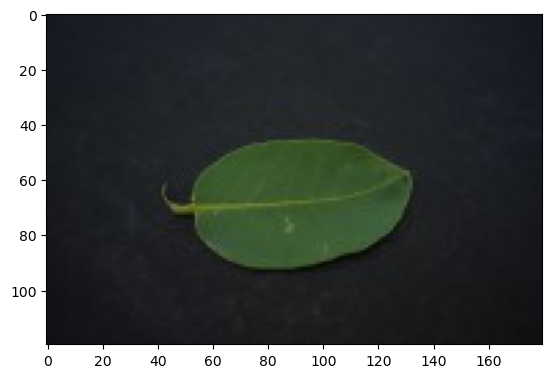

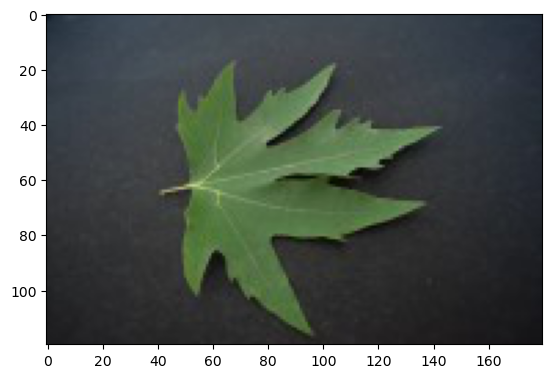

In [65]:
img = Image.open("train/train/Gauva/0004_0011.JPG")
img_array = np.array(img)
plt.imshow(img_array);
plt.show()

img = Image.open("train/train/Arjun/0002_0023.JPG")
img_array = np.array(img)
plt.imshow(img_array);
plt.show()

img = Image.open("train/train/Chinar/0011_0011.JPG")
img_array = np.array(img)
plt.imshow(img_array);
plt.show()

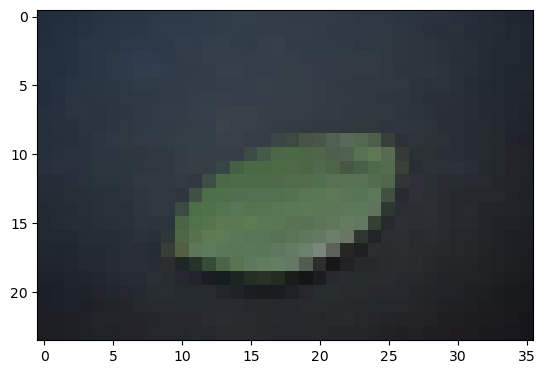

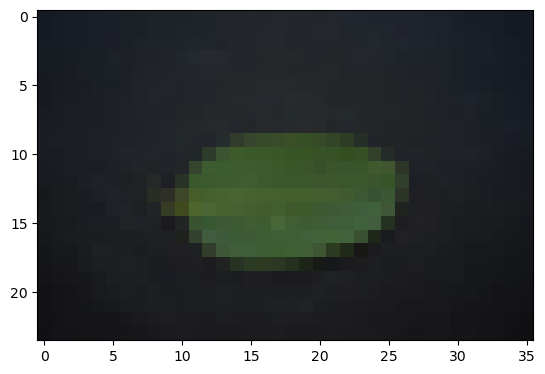

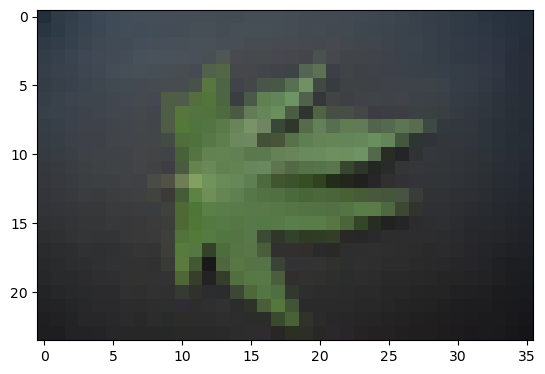

In [64]:
img = Image.open("train/train/Gauva/0004_0011.JPG").resize((36,24))
img_array = np.array(img)
img_array = np.array(img)
plt.imshow(img_array);
plt.show()

img = Image.open("train/train/Arjun/0002_0023.JPG").resize((36,24))
img_array = np.array(img)
img_array = np.array(img)
plt.imshow(img_array);
plt.show()

img = Image.open("train/train/Chinar/0011_0011.JPG").resize((36,24))
img_array = np.array(img)
img_array = np.array(img)
plt.imshow(img_array);
plt.show()

In [60]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_features=3, max_depth = 1)
clf = clf.fit(X_train, y_train)

In [66]:
img = Image.open("train/train/Arjun/0002_0023.JPG").resize((24,36))
img_array = np.array(img)
test_x = np.hstack((img_array[::,::,0],img_array[::,::,1],img_array[::,::,2]))
test_x = (np.reshape(test_x, (2592,)))
print(clf.predict([test_x]))

img = Image.open("train/train/Gauva/0004_0011.JPG").resize((24,36))
img_array = np.array(img)
test_y = np.hstack((img_array[::,::,0],img_array[::,::,1],img_array[::,::,2]))
test_y = (np.reshape(test_y, (2592,)))
print(clf.predict([test_y]))

img = Image.open("train/train/Chinar/0011_0011.JPG").resize((24,36))
img_array = np.array(img)
test_z = np.hstack((img_array[::,::,0],img_array[::,::,1],img_array[::,::,2]))
test_z = (np.reshape(test_z, (2592,)))
print(clf.predict([test_z]))

[11]
[11]
[6]
